In [2]:
import pandas as pd

## Introduction

#### This dataset is centered around World Happiness Score from 2019

In [5]:
df = pd.read_csv("C:/Users/madb3/Downloads/Dataset 19.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
# This data table shows rank, country, score, GDP per capita (), social support, life expectancy score(), freedom (), generosity, and perception of government corruption.

In [186]:
# I would like to explore what contributes to high happiness score and where the U.S ranks in this list

## Data Cleaning

In [188]:
#First make sure there are no null values

In [166]:
print(df.isnull().sum())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [190]:
#See what kind of data is in the table

In [170]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

## Visualization

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Before visualizing, I predict that social support and decision freedom will have the most correlation to happiness. Let's compare how each column contributes to happiness score

#### GDP Correlation

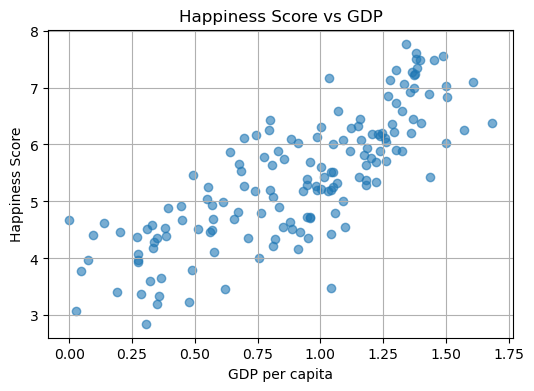

In [45]:
factor = ['GDP per capita']
for f in factor:
    plt.figure(figsize=(6,4))
    plt.scatter(df[factor], df['Score'], alpha=0.6)
    plt.title('Happiness Score vs GDP')
    plt.xlabel(f)
    plt.ylabel('Happiness Score')
    plt.grid(True)
    plt.show()

##### GDP has a steady poisitive correlation with Happiness score

#### Social Support Correlation

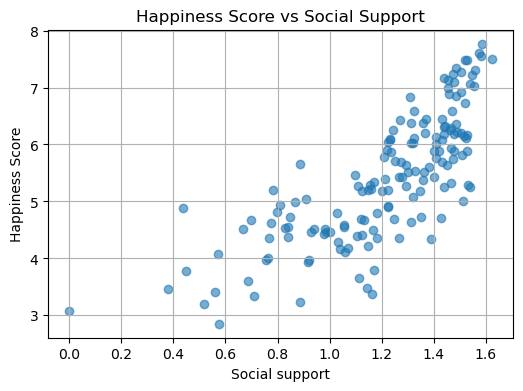

In [43]:
factor = ['Social support']
for f in factor:
    plt.figure(figsize=(6,4))
    plt.scatter(df[factor], df['Score'], alpha=0.6)
    plt.title('Happiness Score vs Social Support')
    plt.xlabel(f)
    plt.ylabel('Happiness Score')
    plt.grid(True)
    plt.show()

##### Social support appears to have a very strong positive correlation with happiness score

#### Life expectancy correlation

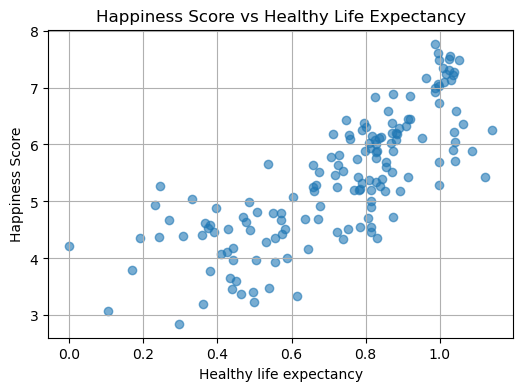

In [49]:
factor = ['Healthy life expectancy']
for f in factor:
    plt.figure(figsize=(6,4))
    plt.scatter(df[factor], df['Score'], alpha=0.6)
    plt.title('Happiness Score vs Healthy Life Expectancy')
    plt.xlabel(f)
    plt.ylabel('Happiness Score')
    plt.grid(True)
    plt.show()

##### There is a strong positive correlation between happiness score and healthy life expectancy

### Freedom Correlation

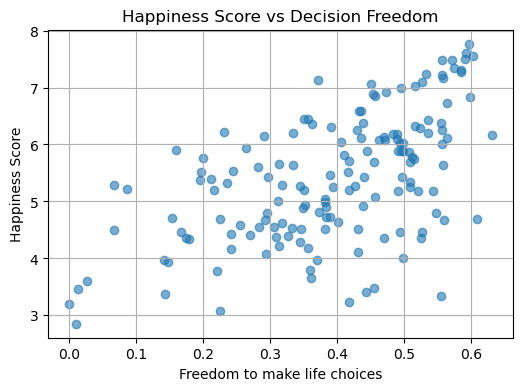

In [51]:
factor = ['Freedom to make life choices']
for f in factor:
    plt.figure(figsize=(6,4))
    plt.scatter(df[factor], df['Score'], alpha=0.6)
    plt.title('Happiness Score vs Decision Freedom')
    plt.xlabel(f)
    plt.ylabel('Happiness Score')
    plt.grid(True)
    plt.show()

##### There is a positive correlation between happiness score and decision freedom

#### Generosity Correlation

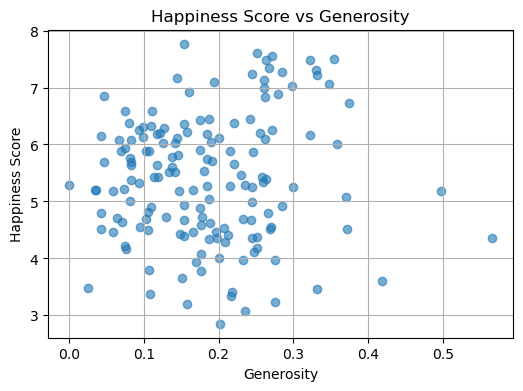

In [53]:
factor = ['Generosity']
for f in factor:
    plt.figure(figsize=(6,4))
    plt.scatter(df[factor], df['Score'], alpha=0.6)
    plt.title('Happiness Score vs Generosity')
    plt.xlabel(f)
    plt.ylabel('Happiness Score')
    plt.grid(True)
    plt.show()

##### Generosity has very little correlation to happiness score! We may want to drop this from the table

#### Negative Government Perception Correlation

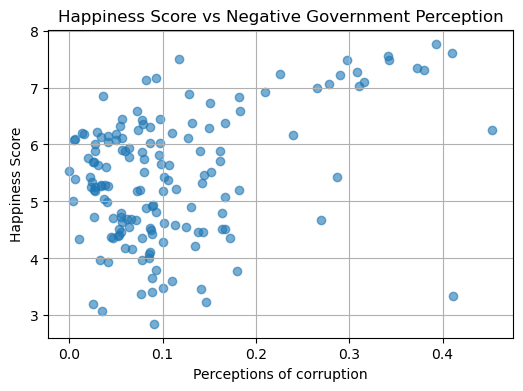

In [55]:
factor = ['Perceptions of corruption']
for f in factor:
    plt.figure(figsize=(6,4))
    plt.scatter(df[factor], df['Score'], alpha=0.6)
    plt.title('Happiness Score vs Negative Government Perception')
    plt.xlabel(f)
    plt.ylabel('Happiness Score')
    plt.grid(True)
    plt.show()

In [92]:
ss_correlation = df['Score'].corr(df['Social support'])
print("Correlation coefficient: ", ss_correlation)

Correlation coefficient:  0.7770577880638643


In [90]:
gdp_correlation = df['Score'].corr(df['GDP per capita'])
print("Correlation coefficient: ", gdp_correlation)

Correlation coefficient:  0.7938828678781276


In [96]:
f_correlation = df['Score'].corr(df['Freedom to make life choices'])
print("Correlation coefficient: ", f_correlation)

Correlation coefficient:  0.5667418257199902


In [98]:
#GDP has the highest correlation with happiness score

In [181]:
ngp_correlation = df['Score'].corr(df['Perceptions of corruption'])
print("Correlation coefficient: ", ngp_correlation)

Correlation coefficient:  0.3856130708664787


### How does the U.S compare on this list?

In [104]:
usa = df[df['Country or region'] == 'United States']
print(usa)

    Overall rank Country or region  Score  GDP per capita  Social support  \
18            19     United States  6.892           1.433           1.457   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
18                    0.874                         0.454        0.28   

    Perceptions of corruption  
18                      0.128  


##### The USA is ranked 19

##### Score: 6.892, GDP per capita: 1.4333, Social Support: 1.457, Healthy life expectancy: .874, Decision Freedom: .454

In [110]:
#When compared to the top 5 happiest countries, Scandinavia and the Netherlands, the US has a higher GDP but a lower social support, healthy expectancy, and decision freedom score

In [184]:
#Side by side bar chart to visualize differences

In [119]:
import numpy as np

In [121]:
subset = df[df['Country or region'].isin(['United States', 'Finland'])]
subset = subset.set_index('Country or region')

In [146]:
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']

usa_results = subset.loc['United States', factors]
finland_results = subset.loc['Finland', factors]

In [152]:
x = np.arange(len(factors))

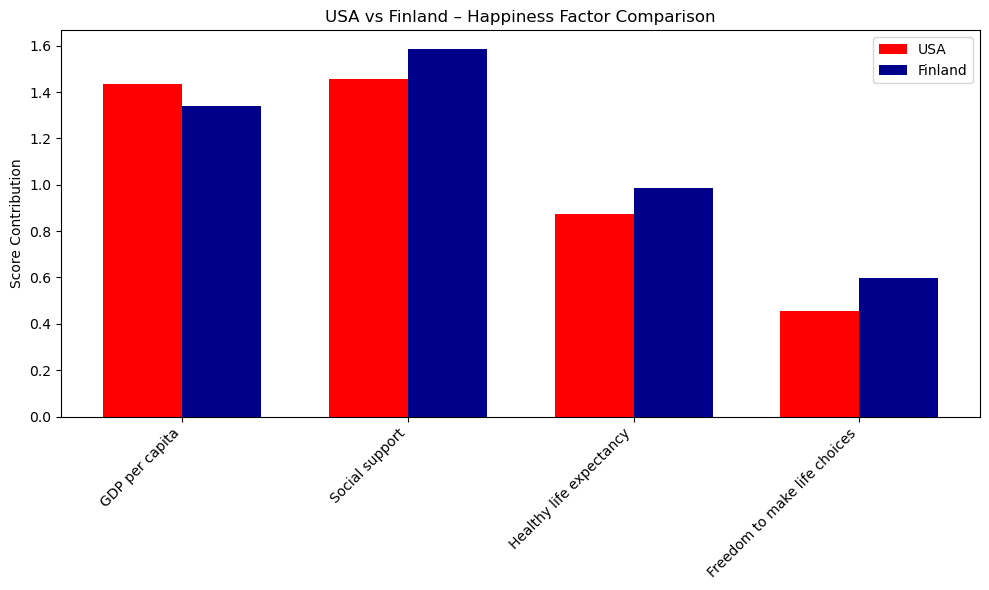

In [160]:
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, usa_results, width, label='USA', color='red')
plt.bar(x + width/2, finland_results, width, label='Finland', color='darkblue')
plt.xticks(x, factors, rotation=45, ha='right')
plt.ylabel('Score Contribution')
plt.title('USA vs Finland – Happiness Factor Comparison')
plt.legend()
plt.tight_layout()
plt.show()

In [195]:
#I would like to see how the lowest ranks to the highest

In [193]:
lowest_rank = df.nlargest(1, 'Overall rank')
print(lowest_rank)

     Overall rank Country or region  Score  GDP per capita  Social support  \
155           156       South Sudan  2.853           0.306           0.575   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
155                    0.295                          0.01       0.202   

     Perceptions of corruption  
155                      0.091  


In [ ]:
#South Sudan is the lowest ranked country from the dataset

In [199]:
dr = df[df['Country or region'] == 'Dominican Republic']
print(dr)

    Overall rank   Country or region  Score  GDP per capita  Social support  \
76            77  Dominican Republic  5.425           1.015           1.401   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
76                    0.779                         0.497       0.113   

    Perceptions of corruption  
76                      0.101  


In [213]:
lowest_rank = df.nlargest(5, 'Overall rank')
print(lowest_rank)

     Overall rank         Country or region  Score  GDP per capita  \
155           156               South Sudan  2.853           0.306   
154           155  Central African Republic  3.083           0.026   
153           154               Afghanistan  3.203           0.350   
152           153                  Tanzania  3.231           0.476   
151           152                    Rwanda  3.334           0.359   

     Social support  Healthy life expectancy  Freedom to make life choices  \
155           0.575                    0.295                         0.010   
154           0.000                    0.105                         0.225   
153           0.517                    0.361                         0.000   
152           0.885                    0.499                         0.417   
151           0.711                    0.614                         0.555   

     Generosity  Perceptions of corruption  
155       0.202                      0.091  
154       0.235     

In [ ]:
#The 5 least happy countries were all actively in wars and conflicts in 2019 with the exception of Tanzania. 